In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score , silhouette_score, davies_bouldin_score
from clustering_metrics import calculate_davies_bouldin_index, calculate_dunn_index, calculate_silhouette_score, euclidean_distance, manhattan_distance

# KMedians

In [2]:
class My_KMedians:
    def __init__(self, k: int):
        self.centroids = None
        self.k = k                
        
    def initialize_centroids(self, X: np.ndarray) -> np.ndarray:
        # choose random k points from X
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        centroids = X[random_indices]
        return centroids
    
    
    def readjust_clusters(self, X: np.ndarray,y: np.ndarray) -> np.ndarray:
        cluster_indices = []
        for i in range(self.k):
            cluster_indices.append(np.argwhere(y==i))
        new_centroids = []
        for i,indices in enumerate(cluster_indices):
            if len(indices)==0:
                new_centroids.append(self.centroids[i])
            else:
                curr_cluster = X[indices]
                centroid = np.median(curr_cluster,axis=0)[0]
                new_centroids.append(centroid)
        return np.array(new_centroids)
            
    def fit(self,X: np.ndarray,max_iters: int) -> np.ndarray:
        self.centroids = self.initialize_centroids(X)

        for _ in range(max_iters):
            y=[]
            for xi in X:
                dist = manhattan_distance(xi,self.centroids)
                cluster = np.argmin(dist)
                y.append(cluster)
            y = np.array(y)
            new_centroids = self.readjust_clusters(X,y)
            if np.allclose(self.centroids, new_centroids, atol=0.001):
                break
            self.centroids = new_centroids
        
        return y
    
    def calculate_inertia(self,X: np.ndarray,y:np.ndarray) -> float:
        inertia = 0
        for i,xi in enumerate(X):
            inertia+= np.sum(np.abs(xi - self.centroids[y[i]]))
        return inertia
    

    def plot(self,X: np.ndarray,y: np.ndarray):
        fig, ax = plt.subplots(figsize=(12, 8))

        ax.scatter(X[:,0],X[:,1],marker='o',c=y)

        ax.scatter(self.centroids[:,0],self.centroids[:,1], marker="x", c="red", linewidth=4)

        plt.show()

    def predict(self,X: np.ndarray) -> np.ndarray:
        preds = []
        for xi in X:
            dist = self.euclidean_distance(xi,self.centroids)
            cluster = np.argmin(dist)
            preds.append(cluster)
        preds = np.array(preds)
        return preds
        

In [3]:
X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

(500, 2)
3


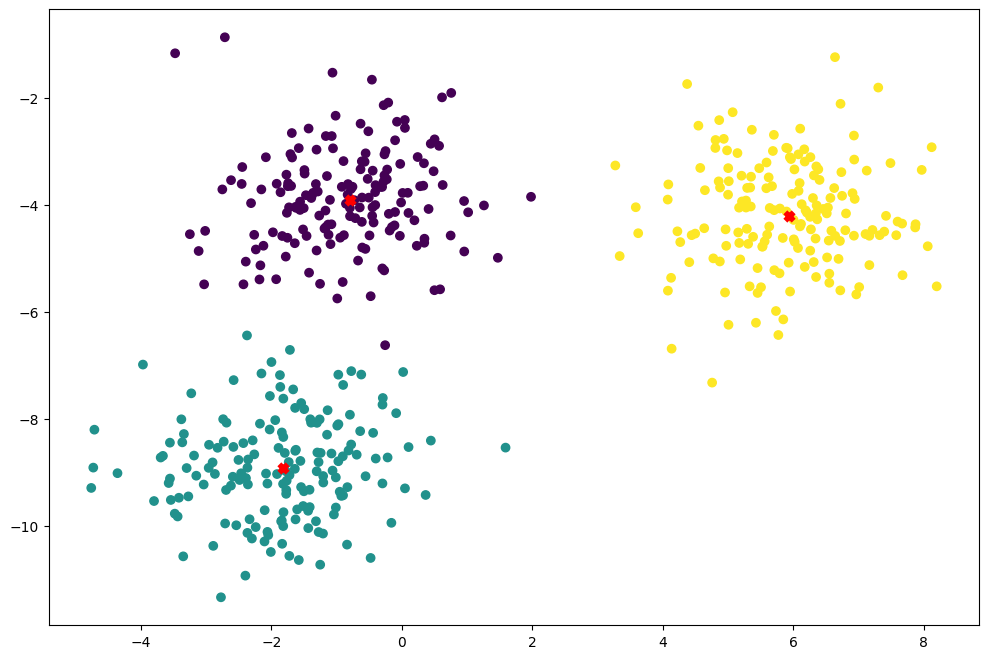

In [4]:
k = My_KMedians(k=clusters)
y_pred = k.fit(X,max_iters=200)
k.plot(X,y_pred)


In [5]:
adjusted_rand_score(y,y_pred)

0.9821085794530156

In [6]:
k.calculate_inertia(X,y_pred)

778.2611082365119

In [8]:
calculate_silhouette_score(X,y_pred, distance_metric_str="manhattan"), silhouette_score(X,y_pred, metric="manhattan")

(0.6615673636162512, 0.6615673636162512)

In [9]:
calculate_dunn_index(X,y_pred, distance_metric_str="manhattan")

0.08866822332551298

In [12]:
# no metric parameter in davies_bouldin_score from sklearn
calculate_davies_bouldin_index(X,y_pred, k.centroids), davies_bouldin_score(X,y_pred)

(0.43767517585117705, 0.4387244408589656)

In [24]:
cluster_numbers = [2,3,4,5,6,7,8,9]
inertia = [] # measures how tight a cluster is (the greater the k the better the inertia so find the elbow)
silhouette_scores = [] # measures how far data points are from centers of other clusters (how well seperated are these clusters)
for k in cluster_numbers:
    my_kmedians = My_KMedians(k=k)
    pred = my_kmedians.fit(X, max_iters=200)
    inertia.append(my_kmedians.calculate_inertia(X,pred))
    silhouette_scores.append(calculate_silhouette_score(X,pred))


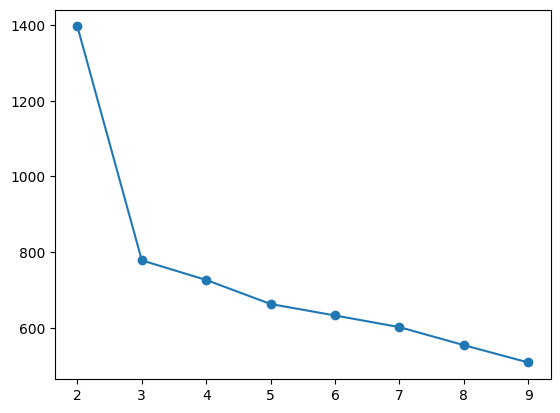

In [25]:
plt.plot(cluster_numbers,inertia, marker="o")

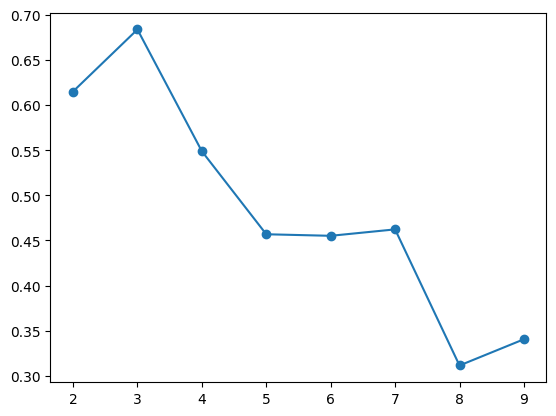

In [26]:
plt.plot(cluster_numbers,silhouette_scores, marker="o")